<a href="https://colab.research.google.com/github/russellheines/ml-experiments/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

original_val_loss_values = history.history['val_loss']

Epoch 1/20
30/30 [==============================] - 3s 86ms/step - loss: 0.5159 - acc: 0.7870 - val_loss: 0.3954 - val_acc: 0.8636
Epoch 2/20
30/30 [==============================] - 2s 65ms/step - loss: 0.3189 - acc: 0.8969 - val_loss: 0.3311 - val_acc: 0.8718
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2417 - acc: 0.9209 - val_loss: 0.2933 - val_acc: 0.8832
Epoch 4/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1976 - acc: 0.9334 - val_loss: 0.2751 - val_acc: 0.8894
Epoch 5/20
30/30 [==============================] - 2s 81ms/step - loss: 0.1667 - acc: 0.9454 - val_loss: 0.2964 - val_acc: 0.8829
Epoch 6/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1389 - acc: 0.9570 - val_loss: 0.3387 - val_acc: 0.8693
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1224 - acc: 0.9611 - val_loss: 0.2920 - val_acc: 0.8856
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1030 - a

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

smaller_val_loss_values = history.history['val_loss']

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 0.6220 - acc: 0.6449 - val_loss: 0.5768 - val_acc: 0.6910
Epoch 2/20
30/30 [==============================] - 1s 48ms/step - loss: 0.5297 - acc: 0.7851 - val_loss: 0.5284 - val_acc: 0.7512
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4752 - acc: 0.8503 - val_loss: 0.4965 - val_acc: 0.8679
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4392 - acc: 0.8908 - val_loss: 0.4734 - val_acc: 0.8660
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4131 - acc: 0.9135 - val_loss: 0.4710 - val_acc: 0.8433
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3905 - acc: 0.9291 - val_loss: 0.4779 - val_acc: 0.8315
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3711 - acc: 0.9408 - val_loss: 0.4474 - val_acc: 0.8723
Epoch 8/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3533 - a

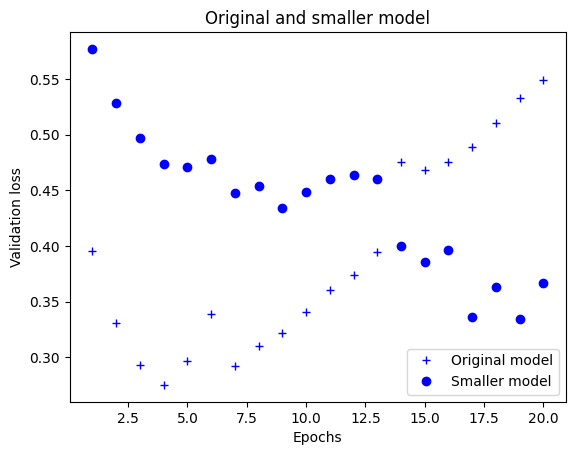

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, 21), original_val_loss_values, 'b+', label='Original model')
plt.plot(range(1, 21), smaller_val_loss_values, 'bo', label='Smaller model')
plt.title('Original and smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()